<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
None
                  mpg              horsepower       weight           acceleration    
mpg            |   1.000, 0.000    -0.778, 0.000    -0.832, 0.000     0.423, 0.000    
horsepower     |  -0.778, 0.000     1.000, 0.000     0.865, 0.000    -0.689, 0.000    
weight         |  -0.832, 0.000     0.865, 0.000     1.000, 0.000    -0.417, 0.000    
accelera

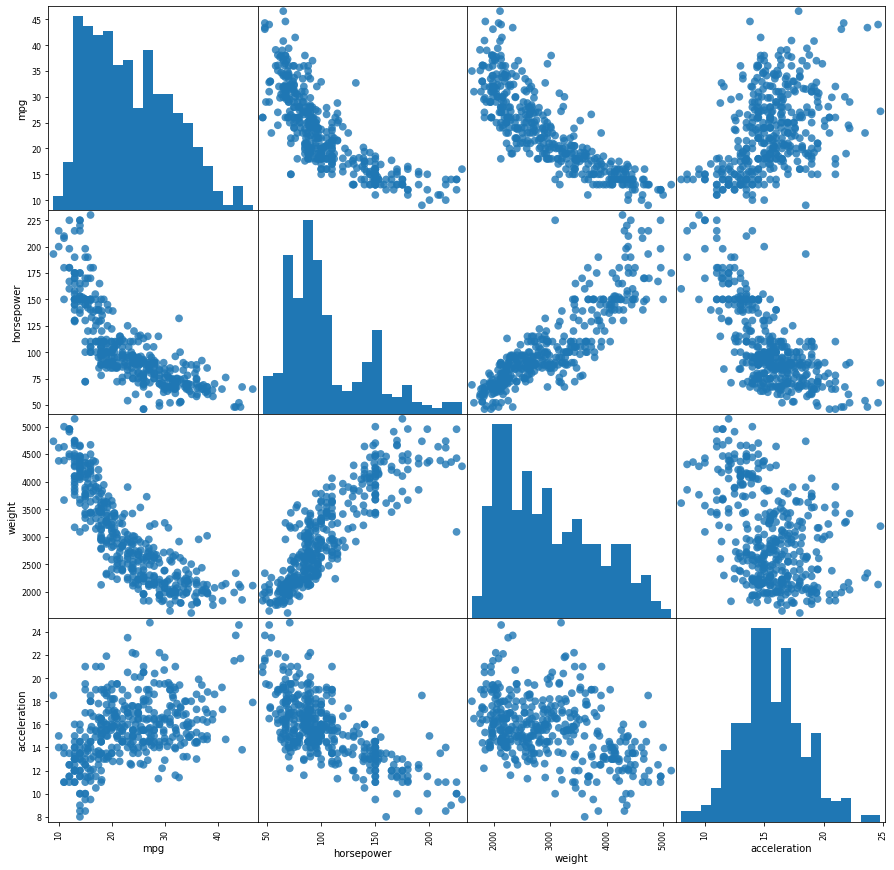

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


df = pd.read_csv('auto-mpg.csv', na_values='?')
mask = df.columns.isin(['mpg', 'horsepower', 'weight', 'acceleration'])
grr = pd.plotting.scatter_matrix(df.loc[:, mask], figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)
df.loc[:, mask].corr()
df.dropna(inplace=True)
print(df.info())

cols = df['mpg'], df['horsepower'], df['weight'], df['acceleration']
print(' '*17, end='')
for col1 in cols:
    print(f' {col1.name:15} ', end='')
print()

for col0 in cols:
    print(f'{col0.name:15}|', end='  ')
    for col1 in cols:
        print('{0:6.3f}, {1:5.3f}'.format(*pearsonr(col0, col1)), end='    ')
        #print(pearsonr(col0, col1), end=' ')
    print()

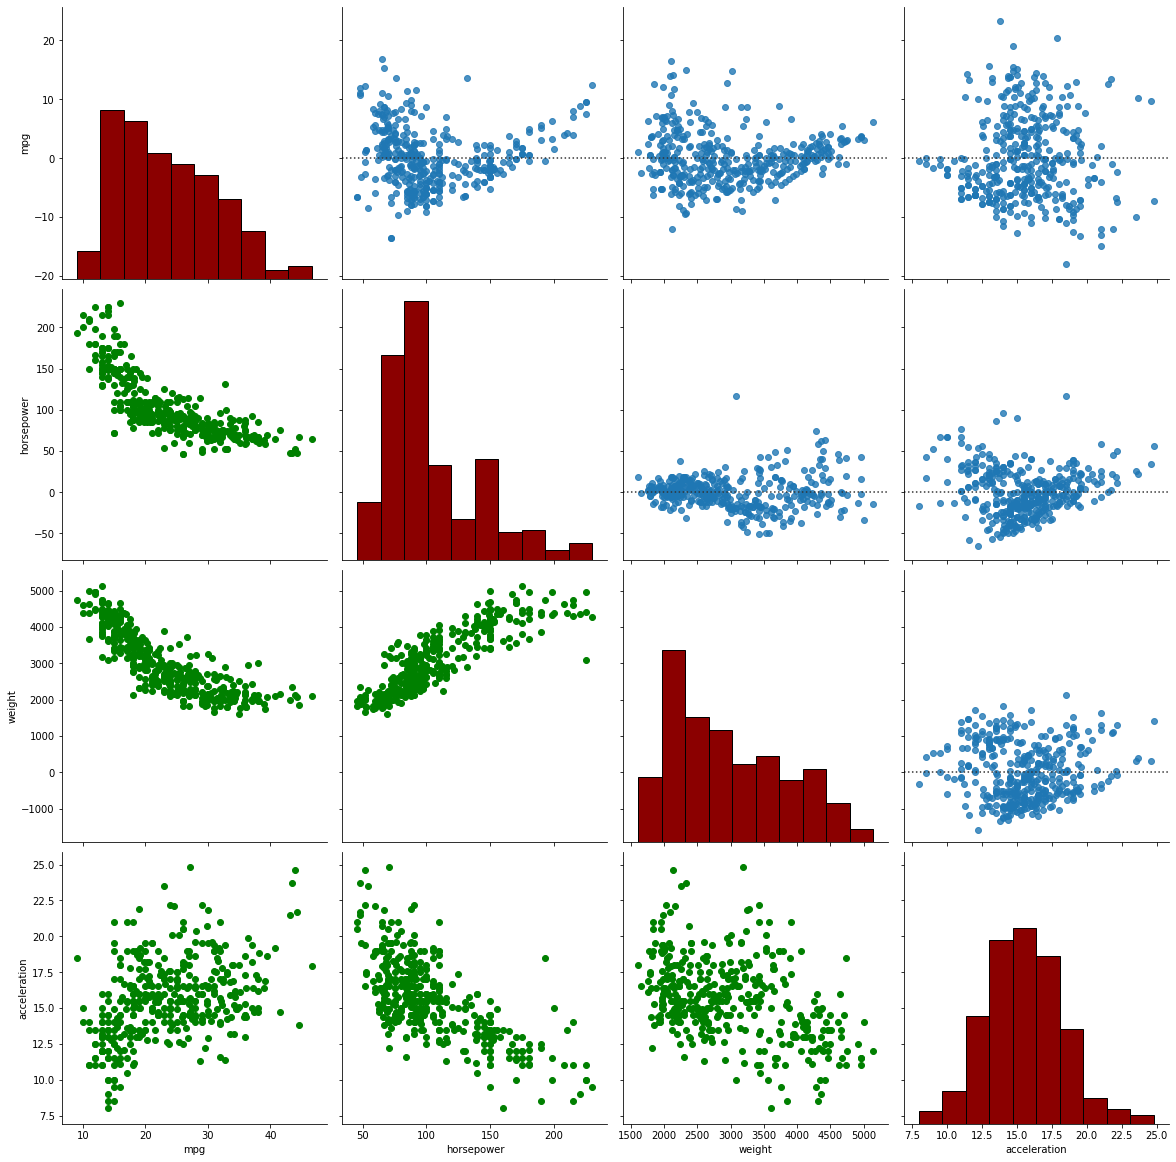

In [86]:
grid = sns.PairGrid(data= df, vars = ['mpg', 'horsepower',  'weight', 'acceleration'], size = 4)
grid = grid.map_upper(sns.residplot)
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', 
                     edgecolor = 'k')
grid = grid.map_lower(plt.scatter, color='green')

In [128]:
#plt.scatter(df['cylinders'], df['model year'])
print(df['cylinders'].values, np.where(df['cylinders'].values==8))
dict((value, np.where(df['cylinders']==value)) for value in df['cylinders'].unique())
#np.where(df['cylinders'] == 3).count()
#stats.chi2_contingency(f_obs)[0:3]

[8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 6 6 6 4 4 4 4 4 4 6 8 8 8 8 4 4 4 6 6 6 6 6
 8 8 8 8 8 8 8 6 4 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 8 8 8 8 8 8 8 8 8 3 8 8 8
 8 4 4 4 4 4 4 4 4 4 8 8 8 8 8 8 8 8 8 8 8 8 6 6 6 6 6 4 8 8 8 8 6 4 4 4 3
 4 6 4 8 8 4 4 4 4 8 4 6 8 6 6 6 4 4 4 4 6 6 6 8 8 8 8 8 4 4 4 4 4 4 4 4 4
 4 4 6 6 6 6 8 8 8 8 6 6 6 6 6 8 8 4 4 6 4 4 4 4 6 4 6 4 4 4 4 4 4 4 4 4 4
 8 8 8 8 6 6 6 6 4 4 4 4 6 6 6 6 4 4 4 4 4 8 4 6 6 8 8 8 8 4 4 4 4 4 8 8 8
 8 6 6 6 6 8 8 8 8 4 4 4 4 4 4 4 4 6 4 3 4 4 4 4 4 8 8 8 6 6 6 4 6 6 6 6 6
 6 8 6 8 8 4 4 4 4 4 4 4 4 5 6 4 6 4 4 6 6 4 6 6 8 8 8 8 8 8 8 8 4 4 4 4 5
 8 4 8 4 4 4 4 4 6 6 4 4 4 4 4 4 4 4 6 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 6 3 4
 4 4 4 4 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 8 6 6 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 6 6 4 6 4 4 4 4 4 4 4 4] (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  25,  26,  27,  28,  37,  38,  39,  40,  41,  42,  43,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  71,  72,  7

{8: (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  25,  26,  27,  28,  37,  38,  39,  40,  41,  42,  43,  61,
          62,  63,  64,  65,  66,  67,  68,  69,  71,  72,  73,  74,  84,
          85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95, 102, 103,
         104, 105, 114, 115, 120, 123, 134, 135, 136, 137, 138, 154, 155,
         156, 157, 163, 164, 185, 186, 187, 188, 206, 210, 211, 212, 213,
         219, 220, 221, 222, 227, 228, 229, 230, 247, 248, 249, 260, 262,
         263, 283, 284, 285, 286, 287, 288, 289, 290, 296, 298, 359],
        dtype=int64),),
 4: (array([ 14,  18,  19,  20,  21,  22,  23,  29,  30,  31,  45,  48,  49,
          50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  75,  76,
          77,  78,  79,  80,  81,  82,  83, 101, 107, 108, 109, 111, 113,
         116, 117, 118, 119, 121, 127, 128, 129, 130, 139, 140, 141, 142,
         143, 144, 145, 146, 147, 148, 149, 165, 166, 168, 169, 170, 171,
         173

In [106]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(df[['horsepower', 'weight', 'acceleration']], df['mpg'])
prediction = model.predict(df[['horsepower', 'weight', 'acceleration']])
print('mpg = {0:.3f} {1:+.3f}*horsepower {2:+.3f}*weight {3:+.3f}*acceleration'.format(model.intercept_, *model.coef_))
print(f'r^2 = {r2_score(df["mpg"], prediction):.3f}')

mpg = 45.678 -0.047*horsepower -0.006*weight -0.002*acceleration
r^2 = 0.706


In [52]:
df['model year'].sample(5)

36     71
397    82
302    79
182    76
30     71
Name: model year, dtype: int64

In [57]:
df['cylinders'].sample(5)
l = list(df['cylinders'])
d = {}
for i in l:
    if i not in d:
        d[i] = 1
    else:
        d[i] += 1
d

{8: 103, 4: 199, 6: 83, 3: 4, 5: 3}